<a href="https://colab.research.google.com/github/nissimlab/scRNA-seq-fixed-pancreas/blob/main/figures_plotting/Plotting_Immune_Figures_DCs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Plotting Immune DCs
#ran 20230413
#Sup Figure 10C-D



## link Gdrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


# Installing packages on Colab

In [ ]:
!pip install setuptools-scm install scipy scanpy anndata leidenalg watermark numpy==1.22.4 pandas==1.5.3 umap-learn==0.5.3 plotnine==0.8.0 panel muon rpy2==3.4.5 anndata2ri ray

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.0/103.0 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 62.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.7/292.7 kB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 kB 20.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.2/56.2 MB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 66.9 MB/s eta 0:00:00
  Preparing metadata

###Fix apt-get -- don't run unless needed

In [ ]:
!ps aux | grep -i apt

root      270179  0.2  0.0 537604 14168 ?        Sl   15:55   0:00 /usr/bin/python3 /usr/local/lib/python3.9/dist-packages/debugpy/adapter --for-server 55371 --host 127.0.0.1 --port 18354 --server-access-token de2b01dbe3a1bd90e7a84f69ef39e945ce0584a0e4d8f54fb74eea04b23d5e4a
root      270475  0.0  0.0   6904  3276 ?        S    15:55   0:00 /bin/bash -c ps aux | grep -i apt
root      270477  0.0  0.0   6444   728 ?        S    15:55   0:00 grep -i apt


In [ ]:
!sudo kill 13488 13489 13543 265979 269551 269553

kill: (269551): No such process
kill: (269553): No such process


In [ ]:
!sudo dpkg --configure -a

Setting up distro-info (0.23ubuntu1) ...
Setting up python3-debconf (1.5.73) ...
Setting up libmspack0:amd64 (0.10.1-2) ...
Setting up python3-yaml (5.3.1-1ubuntu0.1) ...
Setting up libfontenc1:amd64 (1:1.1.4-0ubuntu1) ...
Setting up python3-debian (0.1.36ubuntu1) ...
Setting up xfonts-encodings (1:1.0.5-0ubuntu1) ...
Setting up ubuntu-advantage-tools (27.13.6~20.04.1) ...
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
Created symlink /etc/systemd/system/multi-user.target.wants/ua-reboot-cmds.service → /lib/systemd/system/ua-reboot-cmds.service.
Created symlink /etc/systemd/system/timers.target.wants/ua-timer.timer → /lib/systemd/system/ua-timer.

In [ ]:
!sudo apt-get update

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease
Get:3 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:5 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:6 http://archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:7 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:8 http://archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:9 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:11 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Fetched 114 kB in 3s (44.6 kB/s)
Reading package lists... Done


###install with apt-get

In [ ]:
!sudo apt-get install -y libharfbuzz-dev libharfbuzz-dev libfribidi-dev libcairo2-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  gir1.2-harfbuzz-0.0 libblkid-dev libblkid1 libcairo-script-interpreter2
  libffi-dev libglib2.0-dev libglib2.0-dev-bin libgraphite2-dev
  libharfbuzz-gobject0 libharfbuzz-icu0 liblzo2-2 libmount-dev libmount1
  libpixman-1-dev libselinux1-dev libsepol1-dev libxcb-render0-dev
  libxcb-shm0-dev
Suggested packages:
  libcairo2-doc libgirepository1.0-dev libglib2.0-doc libgdk-pixbuf2.0-bin
  | libgdk-pixbuf2.0-dev libxml2-utils libgraphite2-utils
The following NEW packages will be installed:
  gir1.2-harfbuzz-0.0 libblkid-dev libcairo-script-interpreter2 libcairo2-dev
  libffi-dev libfribidi-dev libglib2.0-dev libglib2.0-dev-bin libgraphite2-dev
  libharfbuzz-dev libharfbuzz-gobject0 libharfbuzz-icu0 liblzo2-2 libmount-dev
  libpixman-1-dev libselinux1-dev libsepol1-dev libxcb-render0-dev
  libxcb-shm0-dev
The following packages will be upgr

In [ ]:
!sudo apt-get install msttcorefonts -qq

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 17.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package libmspack0:amd64.
(Reading database ... 123950 files and directories currently installed.)
Preparing to unpack .../00-libmspack0_0.10.1-2_amd64.deb ...
Unpacking libmspack0:amd64 (0.10.1-2) ...
Selecting previously unselected package cabextract.
Preparing to unpack .../01-cabextract_1.9-3_amd64.deb ...
Unpacking cabextract (1.9-3) ...
Selecting previously unselected package libfontenc1:amd64.
Preparing to unpack .../02-libfontenc1_1%3a1.1.4-0ubuntu1_amd64.deb ...
Unpacking libfontenc1:amd64 (1:1.1.4-0ubun

In [ ]:
!sudo apt install font-manager

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  font-manager-common font-viewer
Suggested packages:
  file-roller nautilus-font-manager nemo-font-manager yelp
The following NEW packages will be installed:
  font-manager font-manager-common font-viewer
0 upgraded, 3 newly installed, 0 to remove and 14 not upgraded.
Need to get 1,740 kB of archives.
After this operation, 9,394 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 font-manager-common amd64 0.7.7-0.3 [1,545 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 font-viewer amd64 0.7.7-0.3 [27.9 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 font-manager amd64 0.7.7-0.3 [168 kB]
Fetched 1,740 kB in 3s (684 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be 

In [ ]:
%%capture
%%!
git clone https://github.com/has2k1/scikit-misc.git
cd scikit-misc
python setup.py install

In [ ]:
!pip install matplotlib==3.5.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 83.1 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


In [ ]:
!rm ~/.cache/matplotlib -rf

#Load font

In [ ]:
import matplotlib.font_manager as fm

In [ ]:
print(fm.findfont('Arial'))

/usr/share/fonts/truetype/msttcorefonts/Arial.ttf


## Import packages

If you want modules to be automatically reloaded when you call them, use `autoreload`:

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import scanpy as sc
import numpy as np
import re
import os
import pandas as pd
import seaborn as sb
import matplotlib
import scipy.sparse as sp
from scipy.sparse import issparse
import anndata2ri
import re

import matplotlib as mpl
from scipy import stats as scistats
import matplotlib.pyplot as pl
import scanpy.external as sce
from matplotlib import colors
from pathlib import Path
from ipywidgets import interactive

import muon as mu
from muon import prot as pt

%matplotlib inline

In [ ]:
%pprint
import time
timestr = time.strftime("%d%m%Y-%H%M%S")
print(timestr)

Pretty printing has been turned OFF
21062023-192719


In [ ]:
# R integration
import anndata2ri
import logging
import rpy2.rinterface_lib.callbacks as rcb
import rpy2.robjects as ro
sc.settings.verbosity = 0
sc.settings.set_figure_params(
    dpi=80,
    facecolor="white",
    frameon=False,
)

rcb.logger.setLevel(logging.ERROR)
ro.pandas2ri.activate()
anndata2ri.activate()

%load_ext rpy2.ipython

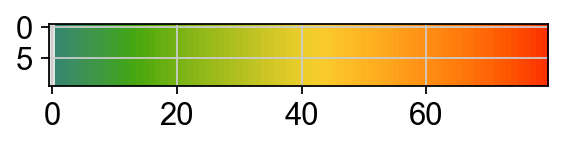

In [ ]:
import colorcet as cc

xs, _ = np.meshgrid(np.linspace(0, 1, 80), np.linspace(0, 1, 10))
colorsComb = np.vstack([pl.cm.Greys_r(np.linspace(0.8,0.1, 1)), cc.cm.rainbow_bgyr_35_85_c72(np.linspace(0.2,1, 100))])
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)
pl.imshow(xs, cmap=mymap);  # use tab completion to choose

In [ ]:
%cd /content/

/content


In [ ]:
# add extra code to the path
!wget https://www.dropbox.com/s/xp4jrhczc0x4aa7/proportions.py
import sys
sys.path.append('/content/')
from proportions import show_values,plot_proportion_barplot_with_ncells

--2023-06-21 19:27:20--  https://www.dropbox.com/s/xp4jrhczc0x4aa7/proportions.py
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/xp4jrhczc0x4aa7/proportions.py [following]
--2023-06-21 19:27:21--  https://www.dropbox.com/s/raw/xp4jrhczc0x4aa7/proportions.py
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb5ed384d17cedc56af252b1c29.dl.dropboxusercontent.com/cd/0/inline/B-bfNCWPwfQy957Tp4bxAqef97vwNamxSdsnvdhSScWcYPnt_R_jV3ccAYFaCjMB28VAcuroSjkj9niQ10WLEjynw_ouSxmWA2exx8sUyYa8e0jiC63oGu2A0uSz568FHqCAQesYod7gKgAovfg0kfxia5ysLWsBbTteKqk9yv7Hzw/file# [following]
--2023-06-21 19:27:21--  https://ucb5ed384d17cedc56af252b1c29.dl.dropboxusercontent.com/cd/0/inline/B-bfNCWPwfQy957Tp4bxAqef97vwNamxSdsnvdhSScWcYPnt_R_jV3ccAYFaCjMB28VAcuroS

#Print package versions

In [ ]:
%load_ext watermark
%watermark
%watermark --iversions -v -m -p numpy,scipy,sklearn,anndata,scanpy,muon,anndata2ri,rpy2,triku

Last updated: 2023-06-21T19:27:24.471059+00:00

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.34.0

Compiler    : GCC 9.4.0
OS          : Linux
Release     : 5.15.107+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.34.0

numpy     : 1.22.4
scipy     : 1.10.1
sklearn   : 1.2.2
anndata   : 0.9.1
scanpy    : 1.9.3
muon      : 0.1.5
anndata2ri: 1.1
rpy2      : 3.4.5
triku     : not installed

Compiler    : GCC 9.4.0
OS          : Linux
Release     : 5.15.107+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit

rpy2      : 3.4.5
muon      : 0.1.5
anndata2ri: 1.1
matplotlib: 3.5.0
colorcet  : 3.0.1
sys       : 3.10.12 (main, Jun  7 2023, 12:45:35) [GCC 9.4.0]
logging   : 0.5.1.2
seaborn   : 0.12.2
numpy     : 1.22.4
scanpy    : 1.9.3
scipy     : 1.10.1
pandas    : 1.5.3
re        : 2.2.1



## Set global parameters

Set some plotting parameters.

In [ ]:
sc._settings.ScanpyConfig.n_jobs=8

pl.rcParams['pdf.fonttype'] = 'truetype'
pl.rcParams['font.family']=['Arial']
sc.set_figure_params(vector_friendly=False,dpi_save=300,transparent=True)
pl.rcParams['lines.linewidth'] = 0.1
#sc.set_figure_params(color_map='viridis')
#colorsComb = np.vstack([pl.cm.Reds(np.linspace(0, 1, 10)), pl.cm.Greys_r(np.linspace(0.7, 0.8, 0))])
#mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)


Set other global parameters

In [ ]:
random_state=42
# should figures just be displayed or also saved?
save_figure = False

# should cashed values be used, or recompute?
force_recompute = False

In [ ]:
#@title load accesory funtions
#@markdown
"""Functions for downstream work with outputs of remove-background."""

import tables
import numpy as np
import scipy.sparse as sp
from typing import Dict


def dict_from_h5(file: str) -> Dict[str, np.ndarray]:
    """Read in everything from an h5 file and put into a dictionary."""
    d = {}
    with tables.open_file(file) as f:
        # read in everything
        for array in f.walk_nodes("/", "Array"):
            d[array.name] = array.read()
    return d


def anndata_from_h5(file: str,
                    analyzed_barcodes_only: bool = True) -> 'anndata.AnnData':
    """Load an output h5 file into an AnnData object for downstream work.

    Args:
        file: The h5 file
        analyzed_barcodes_only: False to load all barcodes, so that the size of
            the AnnData object will match the size of the input raw count matrix.
            True to load a limited set of barcodes: only those analyzed by the
            algorithm. This allows relevant latent variables to be loaded
            properly into adata.obs and adata.obsm, rather than adata.uns.

    Returns:
        adata: The anndata object, populated with inferred latent variables
            and metadata.

    """

    try:
        import anndata
    except ImportError:
        raise ImportError('The anndata package must be installed to use the '
                          'function anndata_from_h5()')

    d = dict_from_h5(file)
    X = sp.csc_matrix((d.pop('data'), d.pop('indices'), d.pop('indptr')),
                      shape=d.pop('shape')).transpose().tocsr()

    if analyzed_barcodes_only:
        if 'barcodes_analyzed_inds' in d.keys():
            X = X[d['barcodes_analyzed_inds'], :]
            d['barcodes'] = d['barcodes'][d['barcodes_analyzed_inds']]
        elif 'barcode_indices_for_latents' in d.keys():
            X = X[d['barcode_indices_for_latents'], :]
            d['barcodes'] = d['barcodes'][d['barcode_indices_for_latents']]
        else:
            print('Warning: analyzed_barcodes_only=True, but the key '
                  '"barcodes_analyzed_inds" or "barcode_indices_for_latents" '
                  'is missing from the h5 file. '
                  'Will output all barcodes, and proceed as if '
                  'analyzed_barcodes_only=False')

    # Construct the count matrix.
    adata = anndata.AnnData(X=X,
                            obs={'barcode': d.pop('barcodes').astype(str)},
                            var={'gene_name': (d.pop('gene_names') if 'gene_names' in d.keys()
                                               else d.pop('name')).astype(str)})
    adata.obs.set_index('barcode', inplace=True)
    adata.var.set_index('gene_name', inplace=True)

    # Add other information to the adata object in the appropriate slot.
    for key, value in d.items():
        try:
            value = np.asarray(value)
            if len(value.shape) == 0:
                adata.uns[key] = value
            elif value.shape[0] == X.shape[0]:
                if (len(value.shape) < 2) or (value.shape[1] < 2):
                    adata.obs[key] = value
                else:
                    adata.obsm[key] = value
            elif value.shape[0] == X.shape[1]:
                if value.dtype.name.startswith('bytes'):
                    adata.var[key] = value.astype(str)
                else:
                    adata.var[key] = value
            else:
                adata.uns[key] = value
        except Exception:
            print('Unable to load data into AnnData: ', key, value, type(value))

    if analyzed_barcodes_only:
        for col in adata.obs.columns[adata.obs.columns.str.startswith('barcodes_analyzed')
                                     | adata.obs.columns.str.startswith('barcode_indices')]:
            try:
                del adata.obs[col]
            except Exception:
                pass

    return adata


def load_anndata_from_input_and_output(input_file: str,
                                       output_file: str,
                                       analyzed_barcodes_only: bool = True,
                                       input_layer_key: str = 'cellranger') -> 'anndata.AnnData':
    """Load remove-background output count matrix into an anndata object,
    together with remove-background metadata and the raw input counts.

    Args:
        input_file: Raw h5 file used as input for remove-background.
        output_file: Output h5 file created by remove-background (can be
            filtered or not).
        analyzed_barcodes_only: Argument passed to anndata_from_h5().
            False to load all barcodes, so that the size of
            the AnnData object will match the size of the input raw count matrix.
            True to load a limited set of barcodes: only those analyzed by the
            algorithm. This allows relevant latent variables to be loaded
            properly into adata.obs and adata.obsm, rather than adata.uns.
        input_layer_key: Key of the anndata.layer that is created for the raw
            input count matrix.

    Return:
        adata_out: AnnData object with counts before and after remove-background,
            as well as inferred latent variables from remove-background.

    """

    # Load input data.
    adata_raw = anndata_from_h5(input_file, analyzed_barcodes_only=False)

    # Load remove-background output data.
    adata_out = anndata_from_h5(output_file, analyzed_barcodes_only=analyzed_barcodes_only)

    # Subset the raw dataset to the relevant barcodes.
    adata_raw = adata_raw[adata_out.obs.index]

    # Put count matrices into 'layers' in anndata for clarity.
    adata_out.layers[input_layer_key] = adata_raw.X.copy()
    adata_out.layers['cellbender'] = adata_out.X.copy()

    # Pre-compute a bit of metadata.
    adata_out.var['n_cellranger'] = np.array(adata_out.layers['cellranger'].sum(axis=0)).squeeze()
    adata_out.var['n_cellbender'] = np.array(adata_out.layers['cellbender'].sum(axis=0)).squeeze()

    return adata_out

#load data

In [ ]:
folder='/content/drive/MyDrive/CIP_v3_data/CIP_all/Immune/'

samplename='CIP_all_v3_'
random_state=42


import os
os.chdir(folder)
if not os.path.exists('./figures/'):
    os.makedirs('./figures/')


In [ ]:
adata=sc.read(samplename+'_immune_20230214_annotated.h5ad')

In [ ]:
adata_all=sc.read('/content/drive/MyDrive/CIP_v3_data/CIP_all/FullDataset/datasets/CIP_all_v3_no_W6_8__filteredNormalized_annotated_2023-02-14.h5ad')

#Immune

In [ ]:
# assuming 'adata' is your AnnData object
adata.obs['annotated'] = adata.obs['annotated'].replace('B', 'B-Cell')


In [ ]:
# assuming 'adata' is your AnnData object
adata.obs['annotated'] = adata.obs['annotated'].replace('Trem2+ Ms4a7+ macrophage', 'Trem2+ macrophage')

In [ ]:

unique_categories = np.unique(adata.obs['annotated'])
print(unique_categories)


['Arg1+ macrophage' 'B-Cell' 'Cycling cDC1' 'Cycling macrophage'
 'Neutrophils' 'Pancreas resident macrophage' 'Plasmacytoid DC'
 'Retnla+ Lyz1+ macrophage' 'T / NK' 'Trem2+ macrophage' 'cDC1' 'cDC2'
 'mregDC']


##Sample colors

In [ ]:
colors_time=['#88a0dc', '#381a61', '#7c4b73', '#ed968c', '#ab3329', '#e78429', '#f9d14a']

#DCs

In [ ]:
adata1=adata[adata.obs['annotated'].isin(['Plasmacytoid DC','cDC1','cDC2','Cycling cDC1','mregDC']),:].copy()
adata1

AnnData object with n_obs × n_vars = 2726 × 19752
    obs: 'sample', 'donor', 'date', 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'scDblFinder_class', 'doublet_score', 'predicted_doublet', 'batch', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'pct_counts_rb', 'QC', 'outlier', 'S_score', 'G2M_score', 'phase', 'leiden_r0.8', 'leiden_r0.5', 'leiden_r0.4', 'ADM', 'Acinar', 'Ductal', 'annotated', 'annotated_fine', 'annotated_ADM', 'annotated_immunegrouped', 'leiden_r0.1', 'leiden_r0.2', 'leiden_r0.3', 'leidenX', 'leidenY', 'annotated2', 'leidenZ'
    var: 'feature_type', 'id', 'mito', 'n_cells', 'mt', 'rb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'tri

In [ ]:
granulocyte_paper={
'General DC':['Flt3','Zbtb46','Itgax'],
'mregDC':['Ccr7','Ccl22'],
'cDC1':[ 'Xcr1','Itgae',   'Clec9a',],
'Cycling cDC1':['Mki67','Top2a','Birc5'],
'cDC2': ['Itgam','Clec4b1','Sirpa'], #'Cd209a'
'Plasmacytoid DC':['Siglech','Ccr9'],
}


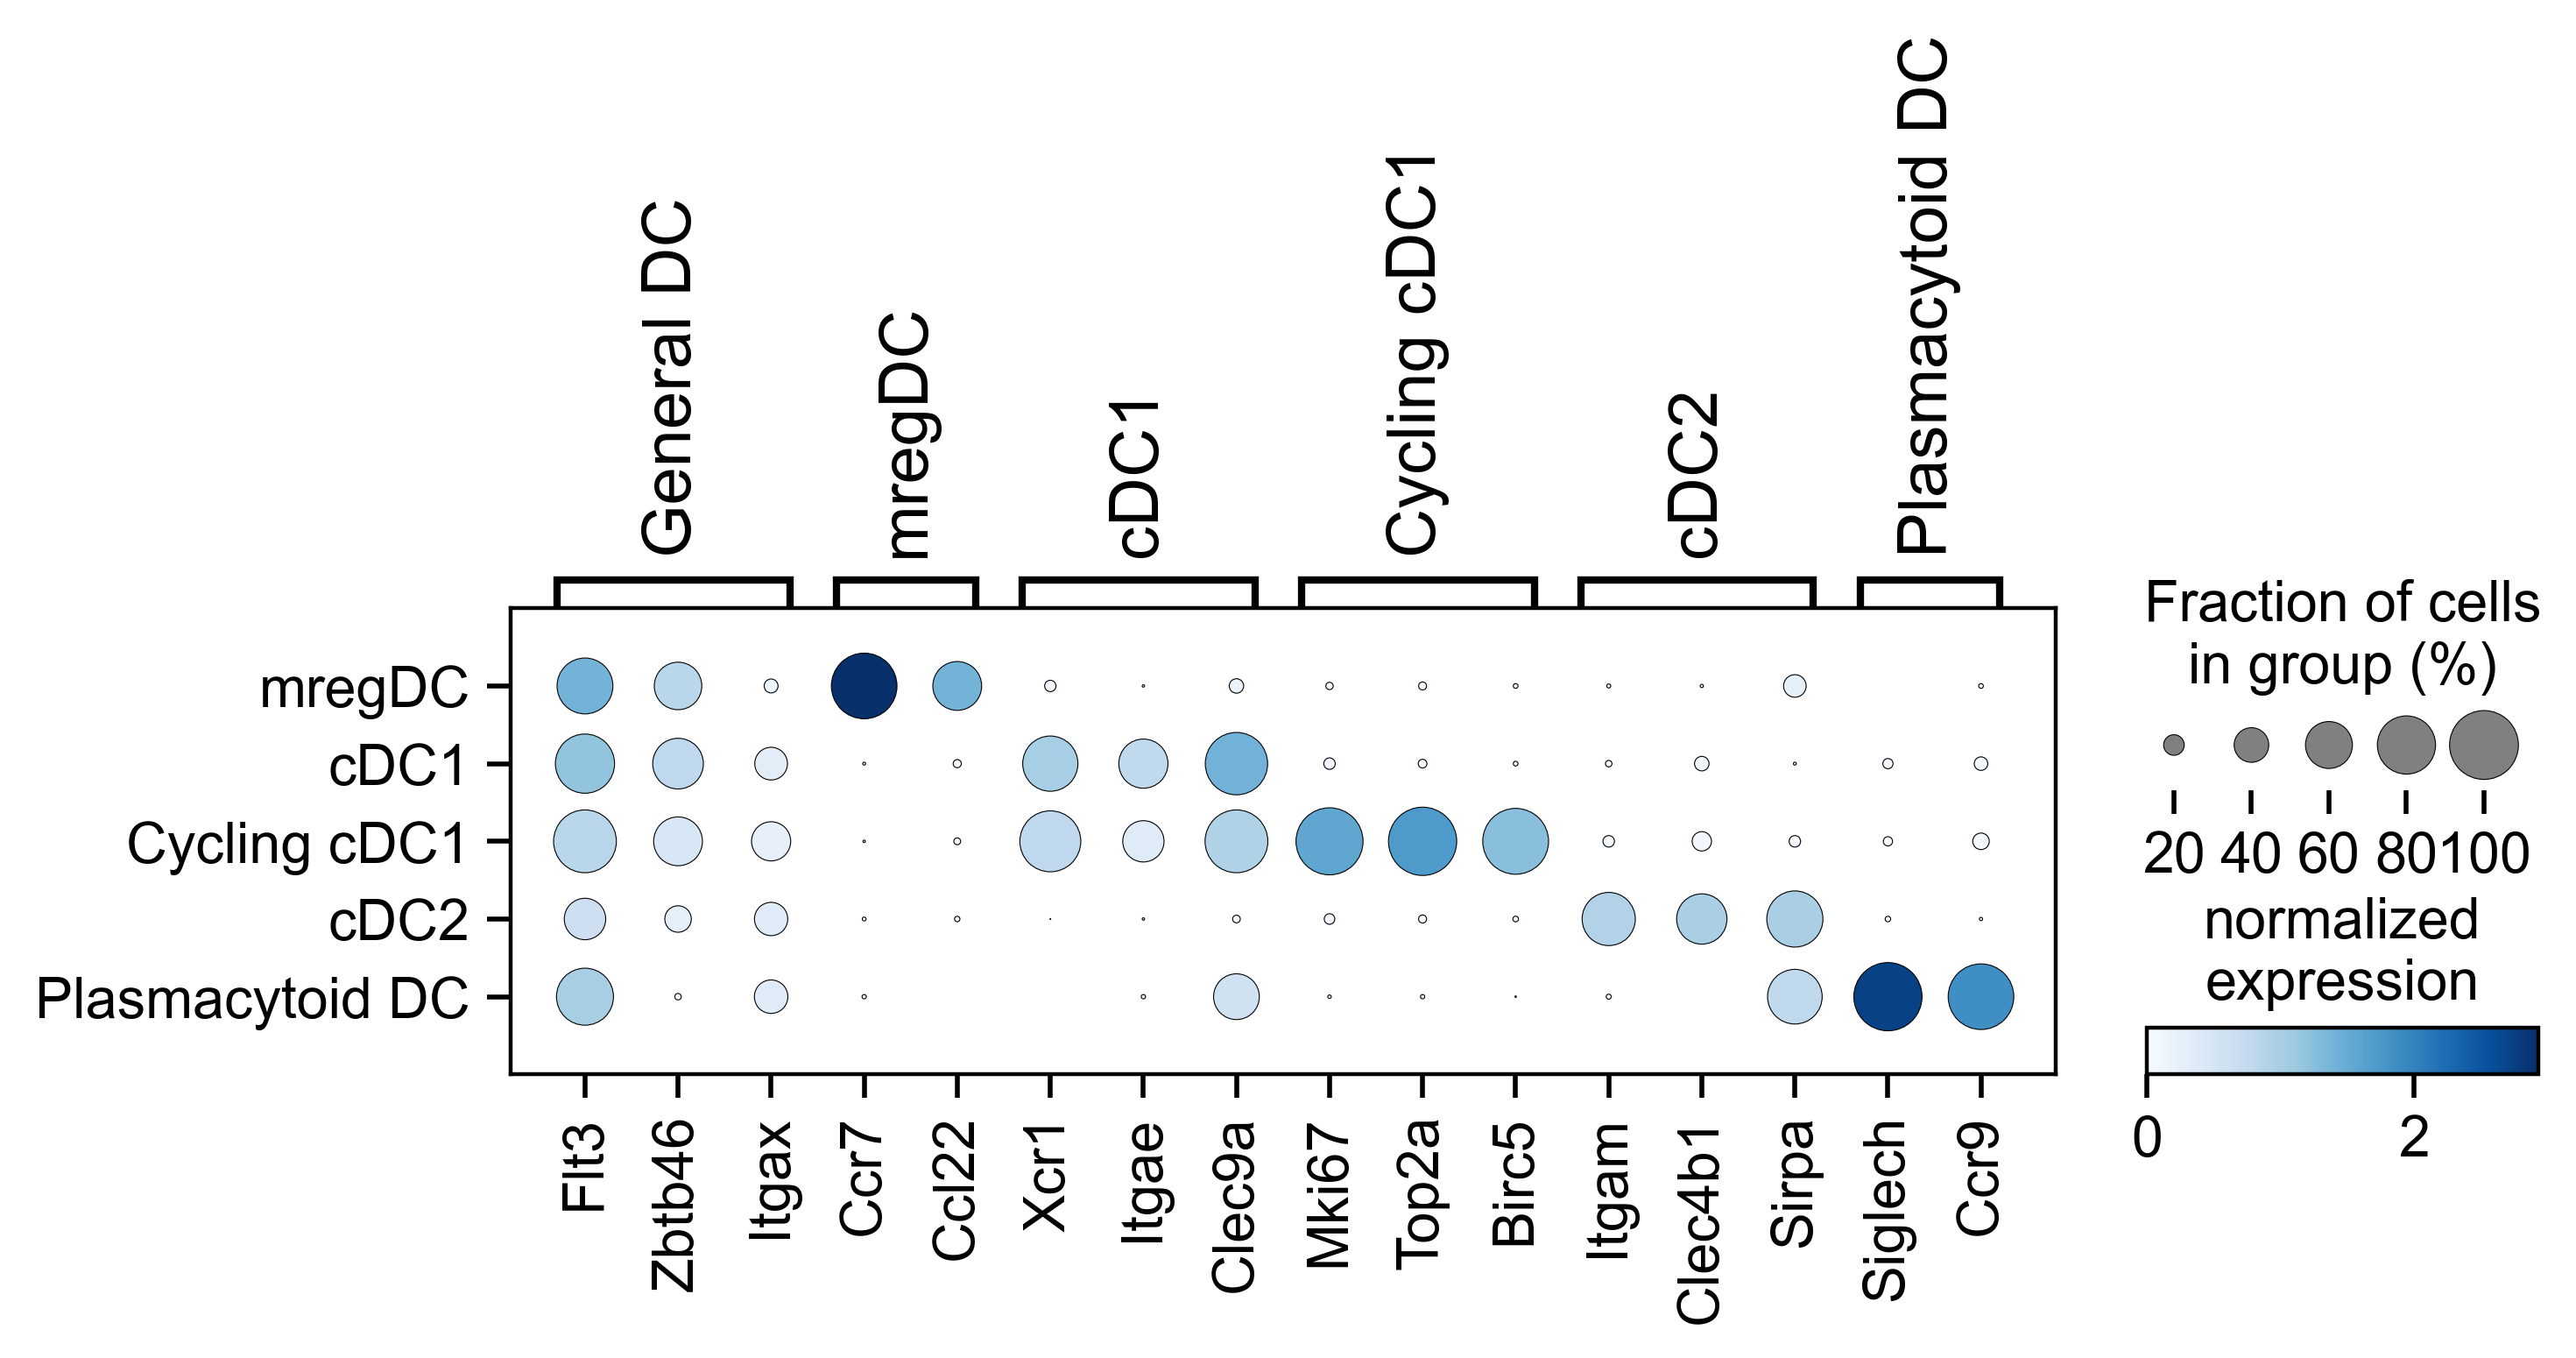

In [ ]:
sc.pl.dotplot(adata1, granulocyte_paper, "annotated", dendrogram=False, cmap='Blues', layer='PFlog1pPF_normalization', colorbar_title='normalized\nexpression')

###Dendritic cell counts -- plotted in Prism9

In [ ]:
import pandas as pd

# Create a copy of the cell data frame
cell_copy = adata.copy()

# Define a list of cell types
celltype_list = ['cDC1','Cycling cDC1','cDC2','mregDC','Plasmacytoid DC']

# Initialize an empty list to store the data frames
df_list = []

# Iterate over the list of cell types
for celltype in celltype_list:
    # Filter the cell data frame by the current cell type
    cell_filtered = cell_copy[cell_copy.obs['annotated']==celltype]

    # Count the number of cells for each donor
    donor_counts = cell_filtered.obs.groupby(['donor']).size()

    # Create a new data frame with donor as rows and cell type as columns
    df = pd.DataFrame(index=donor_counts.index)
    df[celltype] = donor_counts

    # Fill any missing values with zeros
    df = df.fillna(0)

    # Append the data frame to the list
    df_list.append(df)

# Concatenate the data frames into a single data frame
df_final = pd.concat(df_list, axis=1)

df_final['group'] = df_final.index.str.split('_').str[0]

df_final = df_final.fillnan(0)

# Print the resulting data frame
print(df_final)


           cDC1  Cycling cDC1  cDC2  mregDC  Plasmacytoid DC    group
donor                                                                
0hr_1        10           4.0   105      11             22.0      0hr
0hr_2         6           2.0    48       5              6.0      0hr
14day_1       8           0.0    20       3              0.0    14day
14day_2       6           1.0    30       2              1.0    14day
14hr_1       18          11.0   186      11             21.0     14hr
14hr_2        8           0.0    80       5              6.0     14hr
24hr_1       46          21.0   201       6             18.0     24hr
24hr_2       56          17.0   230       2              8.0     24hr
5day_1       41           1.0   116      29             17.0     5day
5day_2       22           2.0   117      45              9.0     5day
72hr_1      140           2.0   216      15             25.0     72hr
72hr_2       79           0.0   254      15             29.0     72hr
control_1    23     